In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [224]:
df = pd.read_csv('Houses.csv')

In [275]:
df.iloc[:, 70:].head()

,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,Remodelled_ago,Sold_ago,Garage_ago
0,WD,0.0,1,8,856.0,1,0.0,0,9,0
1,WD,0.0,1,6,1262.0,1,298.0,0,10,0
2,WD,0.0,1,6,920.0,1,0.0,1,9,0
3,WD,0.0,1,7,756.0,1,0.0,55,11,83
4,WD,0.0,1,9,1145.0,1,192.0,0,9,0


In [231]:
categories = ['CentralAir', 'KitchenAbvGr', 'MSSubClass', 'MiscVal', 'MoSold', 'OverallCond', 'OverallQual', 'Alley', 
              'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition2',
              'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation',
              'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 
              'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 
              'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']
floats = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'EnclosedPorch', 'GrLivArea', 'LotArea', 'LowQualFinSF', 'OpenPorchSF', 'PoolArea', 
'ScreenPorch', 'WoodDeckSF']
for i in categories:
    df[i] = df[i].astype('category')
for j in floats:
    df[j] = df[j].astype('float32')

In [232]:
df.Garage_ago = df.Garage_ago.astype('int32')
df.BsmtFullBath = df.BsmtFullBath.astype('int32')
df.BsmtHalfBath = df.BsmtHalfBath.astype('int32')
df.GarageCars = df.GarageCars.astype('int32')

In [225]:
cond_dict = { "Ex" : 5, "Gd" : 4, "TA" : 3, "Fa":2, "Po": 1, 'absent': 0 }
bsmt_dict = {"Gd" : 4, "Av" : 3, "Mn" : 2, "No" : 1, "absent" : 0}
functional_dict = {"Typ" : 7, "Min1" : 6, "Min2" : 5, "Mod" : 4, "Maj1" : 3, "Maj2" : 2, "Sev" : 1, "Sal" : 0 }
garagefinish_dict  = {  "Fin" : 3, "RFn" : 2, "Unf" : 1, 'absent' : 0}
garagetype_dict = { "2Types" : 6, "Attchd" : 4, "Basment" : 3 , "BuiltIn" : 5, "CarPort" : 1, "Detchd" : 2 , 'absent': 0}
landcount_dict = { "Lvl" : 3, "Bnk" : 1 , "HLS" : 2 , "Low" : 0}
landslope_dict = {"Gtl" : 2, "Mod" : 1, "Sev" : 0}
lotshape_dict = {  "Reg" : 3, "IR1" : 2, "IR2" : 1, "IR3" : 0}
masvnrtype_dict = {"BrkCmn" : 1, "BrkFace" : 2, "CBlock"  : 4, "absent" : 0, "Stone" : 3}
paveddrive_dict = {"Y" : 2, "P" : 1, "N" : 0}
street_dict = {"Grvl" : 0, "Pave" : 1}
utilities_dict = {"AllPub" : 1,  "NoSeWa" : 0}

In [226]:
df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_dict)
df['Functional'] = df['Functional'].map(functional_dict)
df['GarageFinish'] = df['GarageFinish'].map(garagefinish_dict)
df['GarageType'] = df['GarageType'].map(garagetype_dict)
df['LandContour'] = df['LandContour'].map(landcount_dict)
df['LandSlope'] = df['LandSlope'].map(landslope_dict)
df['LotShape'] =  df['LotShape'].map(lotshape_dict)
df['MasVnrType'] = df['MasVnrType'].map(masvnrtype_dict)
df['PavedDrive'] = df['PavedDrive'].map(paveddrive_dict)
df.Street = df.Street.map(street_dict)
df.Utilities = df.Utilities.map(utilities_dict)
df.CentralAir = df.CentralAir.replace({'Y' : 1, "N" : 0})

In [229]:
cond = ['BsmtQual', 'ExterCond', 'ExterQual', 'FireplaceQu', 'BsmtCond', 'GarageCond', 'GarageQual', 'HeatingQC', 
        'KitchenQual', 'PoolQC']
for i in cond:
    df[i] = df[i].replace(cond_dict)

In [233]:
for k in df.columns:
    if df[k].dtype == 'int64':
        df[k] =df[k].astype('int32')
    elif df[k].dtype == 'float64':
        df[k] =df[k].astype('float32')

In [418]:
for k in df.columns:
    if (df[k].dtype != 'int32') & (df[k].dtype != 'float32'):
        print(df[k].columns)

AttributeError: 'Series' object has no attribute 'columns'

In [263]:
df(header_list)

NameError: name 'header_list' is not defined

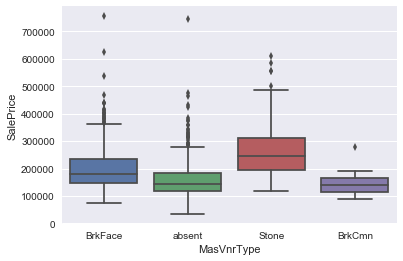

In [78]:
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data =df)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
1stFlrSF          2919 non-null float32
2ndFlrSF          2919 non-null float32
3SsnPorch         2919 non-null float32
Alley             2919 non-null category
BedroomAbvGr      2919 non-null int32
BldgType          2919 non-null category
BsmtCond          2919 non-null category
BsmtExposure      2919 non-null category
BsmtFinSF1        2919 non-null float32
BsmtFinSF2        2919 non-null float32
BsmtFinType1      2919 non-null category
BsmtFinType2      2919 non-null category
BsmtFullBath      2919 non-null int32
BsmtHalfBath      2919 non-null int32
BsmtQual          2919 non-null category
BsmtUnfSF         2919 non-null float32
CentralAir        2919 non-null category
Condition1        2919 non-null category
Condition2        2919 non-null category
Electrical        2919 non-null category
EnclosedPorch     2919 non-null float32
ExterCond         2919 non-null category
ExterQu

In [252]:
len(categories)

49

In [461]:
df_cat = df[['Alley', 'BldgType', 'BsmtFinType1', 'BsmtFinType2', 'Condition1', 'Condition2', 'Electrical', 
             'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation', 'Heating', 'HouseStyle', 'LotConfig', 'MSSubClass', 
             'MSZoning', 'MiscFeature', 'MoSold', 'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType']]

In [462]:
df_cat.head()

,Alley,BldgType,BsmtFinType1,BsmtFinType2,Condition1,Condition2,Electrical,Exterior1st,Exterior2nd,Fence,...,LotConfig,MSSubClass,MSZoning,MiscFeature,MoSold,Neighborhood,RoofMatl,RoofStyle,SaleCondition,SaleType
0,0,1Fam,GLQ,Unf,Norm,Norm,SBrkr,VinylSd,VinylSd,absent,...,Inside,60,RL,absent,2,CollgCr,CompShg,Gable,Normal,WD
1,0,1Fam,ALQ,Unf,Feedr,Norm,SBrkr,MetalSd,MetalSd,absent,...,FR2,20,RL,absent,5,Veenker,CompShg,Gable,Normal,WD
2,0,1Fam,GLQ,Unf,Norm,Norm,SBrkr,VinylSd,VinylSd,absent,...,Inside,60,RL,absent,9,CollgCr,CompShg,Gable,Normal,WD
3,0,1Fam,ALQ,Unf,Norm,Norm,SBrkr,Wd Sdng,Wd Shng,absent,...,Corner,70,RL,absent,2,Crawfor,CompShg,Gable,Abnorml,WD
4,0,1Fam,GLQ,Unf,Norm,Norm,SBrkr,VinylSd,VinylSd,absent,...,FR2,60,RL,absent,12,NoRidge,CompShg,Gable,Normal,WD


In [463]:
Alley_enc = pd.get_dummies(df_cat.Alley, prefix = 'Alley', drop_first = True)
BldgType_enc = pd.get_dummies(df_cat.BldgType, prefix = 'BldgType', drop_first = True)
BsmtFinType1_enc = pd.get_dummies(df_cat.BsmtFinType1, prefix = 'BsmtFinType1', drop_first = True)
BsmtFinType2_enc = pd.get_dummies(df_cat.BsmtFinType2, prefix = 'BsmtFinType2', drop_first = True)
Condition1_enc = pd.get_dummies(df_cat.Condition1, prefix = 'Condition1', drop_first = True)
Condition2_enc = pd.get_dummies(df_cat.Condition2, prefix = 'Condition2', drop_first = True)
Electrical_enc = pd.get_dummies(df_cat.Electrical, prefix = 'Electrical', drop_first = True)
Exterior1st_enc = pd.get_dummies(df_cat.Exterior1st, prefix = 'Exterior1st', drop_first = True)
Exterior2nd_enc = pd.get_dummies(df_cat.Exterior2nd, prefix = 'Exterior2nd', drop_first = True)
Fence_enc = pd.get_dummies(df_cat.Fence, prefix = 'Fence', drop_first = True)
Foundation_enc = pd.get_dummies(df_cat.Foundation, prefix = 'Foundation', drop_first = True)
Heating_enc = pd.get_dummies(df_cat.Heating, prefix = 'Heating', drop_first = True)
HouseStyle_enc = pd.get_dummies(df_cat.HouseStyle, prefix = 'HouseStyle', drop_first = True)
LotConfig_enc = pd.get_dummies(df_cat.LotConfig, prefix = 'LotConfig', drop_first = True)
MSSubClass_enc = pd.get_dummies(df_cat.MSSubClass, prefix = 'MSSubClass', drop_first = True)
MSZoning_enc = pd.get_dummies(df_cat.MSZoning, prefix = 'MSZoning', drop_first = True)
MiscFeature_enc = pd.get_dummies(df_cat.MiscFeature, prefix = 'MiscFeature', drop_first = True)
MoSold_enc = pd.get_dummies(df_cat.MoSold, prefix = 'MoSold', drop_first = True)
Neighborhood_enc = pd.get_dummies(df_cat.Neighborhood, prefix = 'Neighborhood', drop_first = True)
RoofMatl_enc = pd.get_dummies(df_cat.RoofMatl, prefix = 'RoofMatl', drop_first = True)
RoofStyle_enc = pd.get_dummies(df_cat.RoofStyle, prefix = 'RoofStyle', drop_first = True)
SaleCondition_enc = pd.get_dummies(df_cat.SaleCondition, prefix = 'SaleCondition', drop_first = True)
SaleType_enc = pd.get_dummies(df_cat.SaleType, prefix = 'SaleType', drop_first = True)

In [464]:
df_d = pd.concat([Alley_enc, BldgType_enc, BsmtFinType1_enc, BsmtFinType2_enc, Condition1_enc, Condition2_enc, 
            Electrical_enc, Exterior1st_enc, Exterior2nd_enc, Fence_enc, Foundation_enc, Heating_enc,
            HouseStyle_enc, LotConfig_enc, MSSubClass_enc, MSZoning_enc, MiscFeature_enc, MoSold_enc, 
            Neighborhood_enc, RoofMatl_enc, RoofStyle_enc, SaleCondition_enc, SaleType_enc] , axis = 1)

In [468]:
df_d.head()

,Alley_1,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,...,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [469]:
col = df_cat.columns.tolist()
df1 = df.drop(col, axis = 1)
df1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,SalePrice,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,Remodelled_ago,Sold_ago,Garage_ago
0,856.0,854.0,0.0,3,3,1,706.0,0.0,1,0,...,208500.0,0.0,1,8,856.0,1,0.0,0,9,0
1,1262.0,0.0,0.0,3,3,4,978.0,0.0,0,1,...,181500.0,0.0,1,6,1262.0,1,298.0,0,10,0
2,920.0,866.0,0.0,3,3,2,486.0,0.0,1,0,...,223500.0,0.0,1,6,920.0,1,0.0,1,9,0
3,961.0,756.0,0.0,3,4,1,216.0,0.0,1,0,...,140000.0,0.0,1,7,756.0,1,0.0,55,11,83
4,1145.0,1053.0,0.0,4,3,3,655.0,0.0,1,0,...,250000.0,0.0,1,9,1145.0,1,192.0,0,9,0


In [437]:
df_float = df.loc[:, df.dtypes == np.float32].drop('SalePrice', axis = 1)
df_int = df.loc[:, df.dtypes == np.int32]

In [470]:
df_f =pd.concat([df1, df_d], axis = 1)

In [471]:
house_test = df_f[df_f.SalePrice.isnull()]
house_test.to_csv("House_test.csv", index = False)

In [472]:
house_train = df_f[df_f.SalePrice.notnull()]
house_train.to_csv("House_train.csv", index = False)